In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
...,...,...,...,...
195,0.255081,-0.231497,-0.239632,38.067836
196,0.276068,-0.648411,-0.077441,12.812755
197,0.122250,-1.157383,0.765721,70.454115
198,-0.914822,-0.897140,-0.784205,-93.235783


In [9]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

array([  -9.76318213,  -24.02935493,   45.61642069,   34.13573658,
         86.66364674,  -77.89735638,  -75.23160582,  -57.49271113,
        -54.17628622,   29.46983531,  -87.07697894,   61.49707765,
        -87.1908553 ,  189.52586717, -105.60940906,   72.93452847,
         33.37559704, -108.0026368 , -127.03270151,  -97.32244317,
        -56.51293004,  -61.6929032 ,  -46.54502761,  -55.46277415,
         98.27590634,   53.88321804,  -69.66191612,  143.07902342,
       -114.61997528,   31.85127955,  -44.39024034,    1.48968394,
        -88.71622065,   87.12681822,  -17.28585002,  150.20169579,
        -71.41503479, -139.82571896,  190.13399327,  126.78997841,
        191.14039956,  -15.88018358,   79.0476178 ,   32.44367679,
         43.23159853,  -34.70291861,  -94.49899703,   92.90733739,
        -49.79965934, -257.06342658,  -28.33835823,   52.78981793,
       -114.24973574,   31.88367296,   80.14978081,   85.36236114,
        -95.10607425,  -42.28614302,   -2.46076531,  215.04675

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# Residual 
y_pred = model.predict(X_test)
residual = y_test - y_pred

 ### 1. Linear Relationship

## fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title('Feature1')
ax2.scatter(df['feature2'], df['target'])
ax2.set_title('Feature2')
ax3.scatter(df['feature3'], df['target'])
ax3.set_title('Feature3')


### 2. Multicollinearity

In [22]:
from ipywidgets import interact
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))


In [26]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

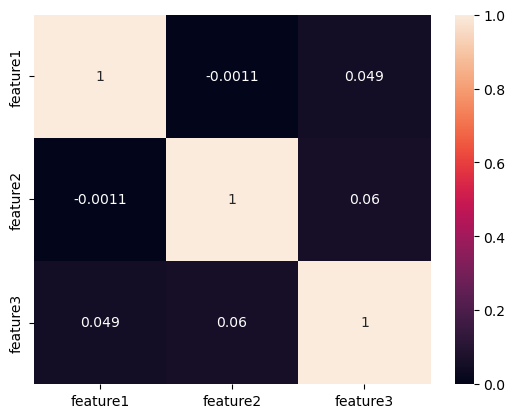

In [27]:
### Another technique 

sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

### 3. Normality Residual

/var/folders/_n/yqkwhlp51y5g1jy3k678jv8w0000gn/T/ipykernel_16564/1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

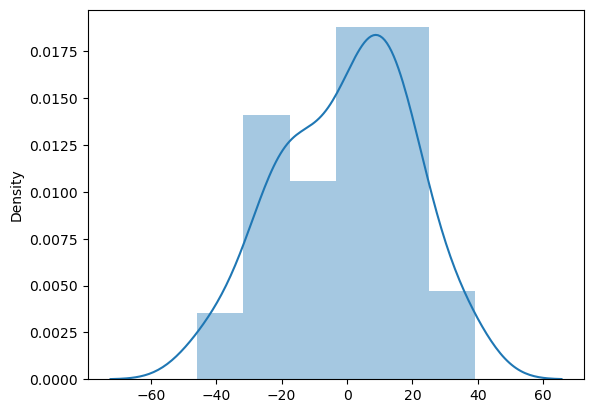

In [31]:
sns.distplot(residual)

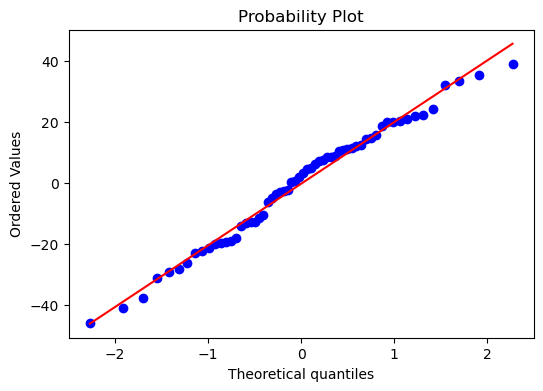

In [33]:
## QQplot

import scipy as sp
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.show()

### 4. Homoscedasticity

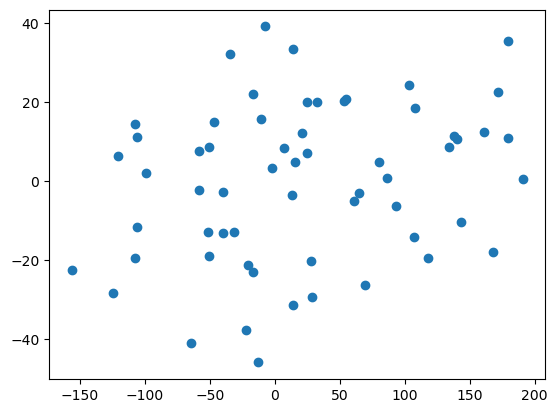

In [34]:
plt.scatter(y_pred, residual)

### 5. Autocorrelation of Residuals

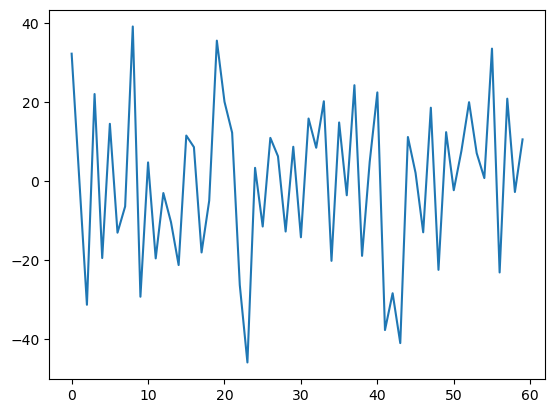

In [36]:
plt.plot(residual)